Where we test our model and do data exploration

In [2]:
from solution_example_versionJA import *
import pandas as pd

In [3]:
main()

Training accuracy:  0.68
f1_score:  0.0
precision score:  0.0
recall score:  0.0
Test accuracy:  0.3725
f1_score:  0.5428051001821493
precision score:  1.0
recall score:  0.3725


c:\Users\johnj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Extracting the functions seperately to see how they work

In [5]:
train_path = 'https://raw.githubusercontent.com/iraola/ML4CE-AD/main/coursework/data/data_train.csv'
test_path = 'https://raw.githubusercontent.com/iraola/ML4CE-AD/main/coursework/data/data_test.csv'


In [ ]:
 # Set up preprocessing
preprocess_params = fit_preprocess(train_path)

    # # Load and preprocess data
    # X_train, y_train = load_and_preprocess(train_path, preprocess_params)
    # X_test, y_test = load_and_preprocess(test_path, preprocess_params)

    # # Get the detection model
    # threshold = fit_model(X_train)

    # # Check performance on data
    # # (just for us to see it works properly, the grader might use other data)
    # y_pred_train = predict(X_train, threshold)
    # print('Training accuracy: ', accuracy_score(y_train, y_pred_train))
    # y_pred_test = predict(X_test, threshold)
    # print('Test accuracy: ', accuracy_score(y_test, y_pred_test))

In [7]:
x = pd.read_csv(train_path)
normal = x['label'].value_counts()[0]
y=pd.read_csv(test_path)
# normal = y['label'].value_counts()[1]

In [ ]:
a = x.mean
print(x.columns[0])

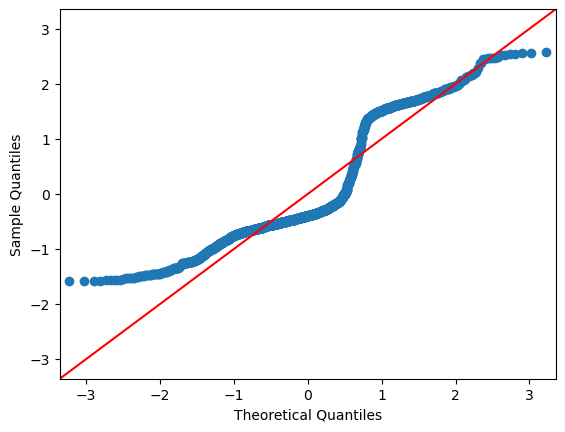

quartile plot for: XMEAS(1)


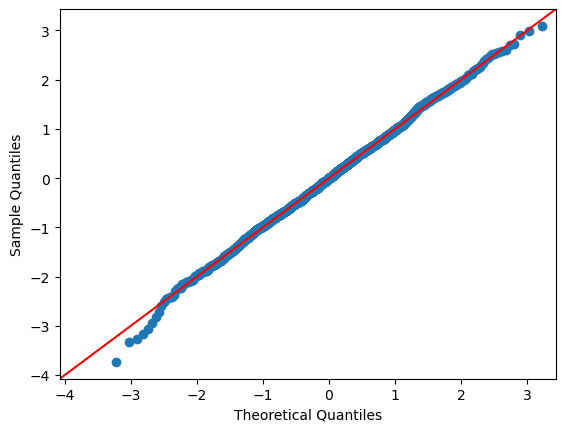

quartile plot for: XMEAS(2)


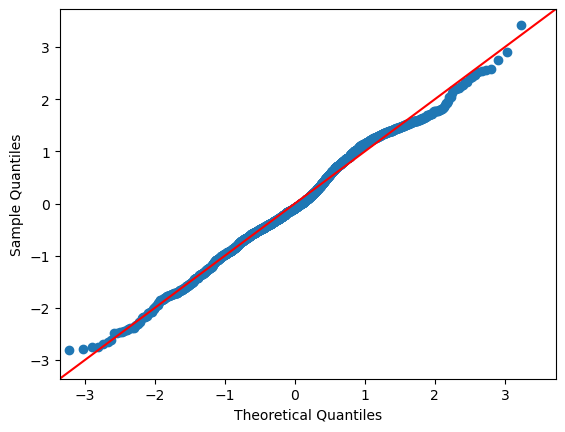

quartile plot for: XMEAS(3)


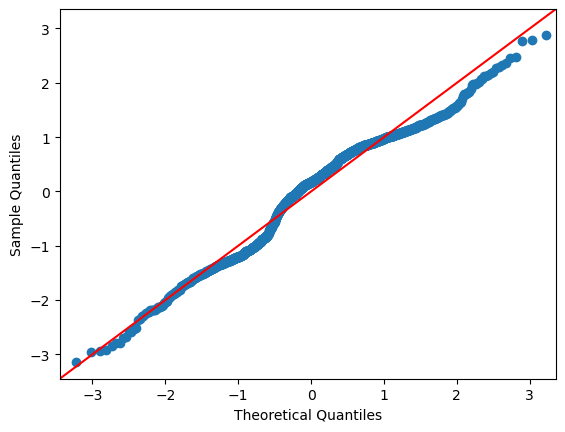

quartile plot for: XMEAS(4)


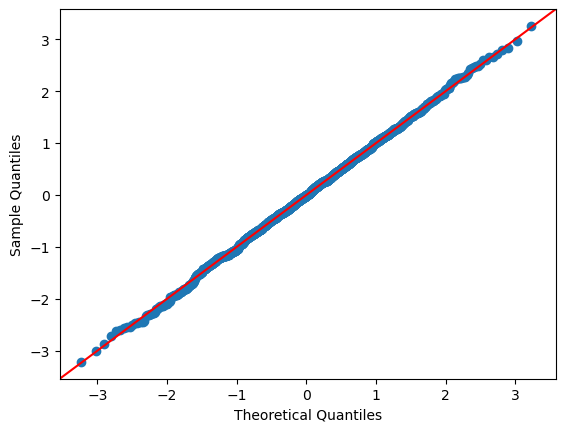

quartile plot for: XMEAS(5)


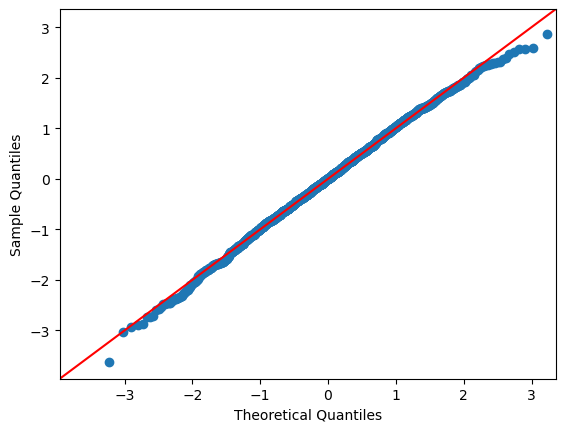

quartile plot for: XMEAS(6)


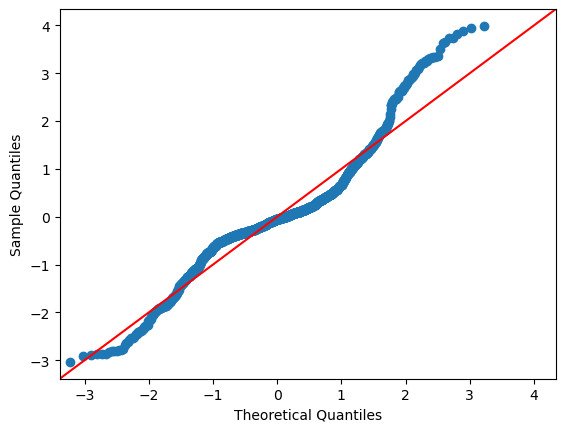

quartile plot for: XMEAS(7)


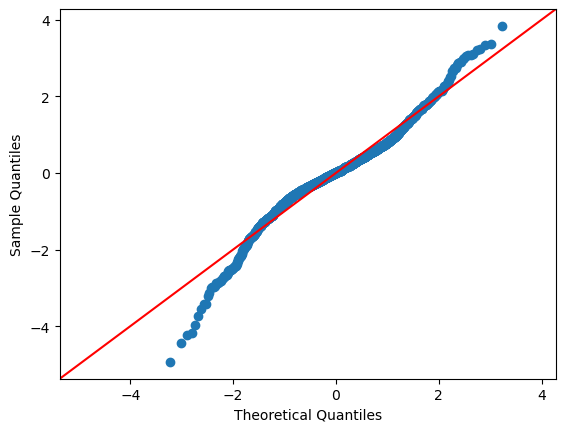

quartile plot for: XMEAS(8)


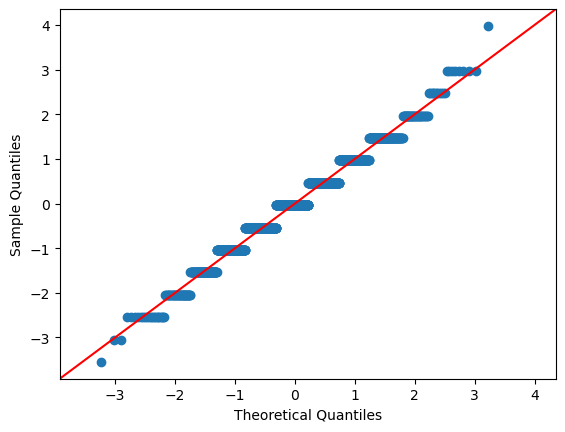

quartile plot for: XMEAS(9)


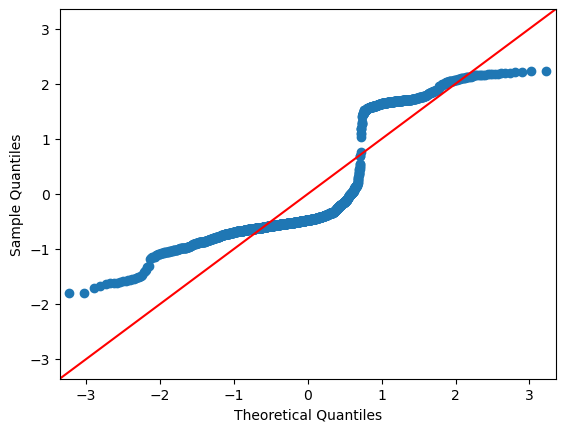

quartile plot for: XMEAS(10)


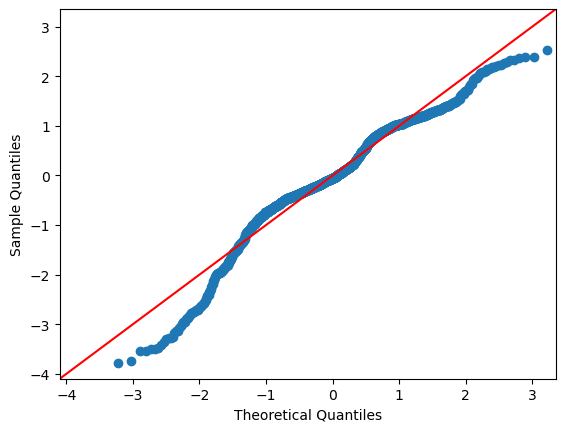

quartile plot for: XMEAS(11)


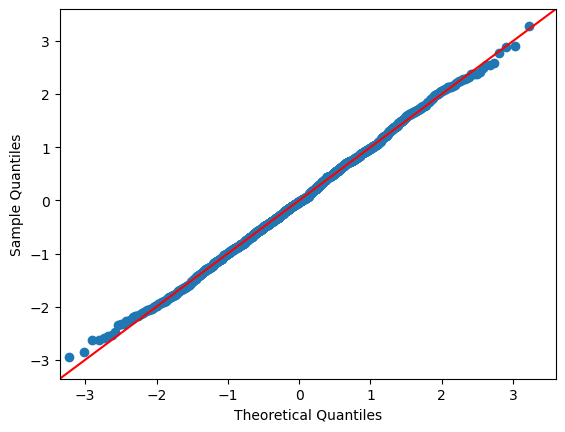

quartile plot for: XMEAS(12)


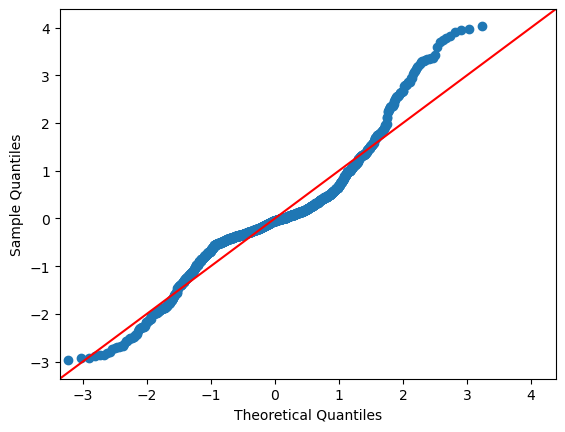

quartile plot for: XMEAS(13)


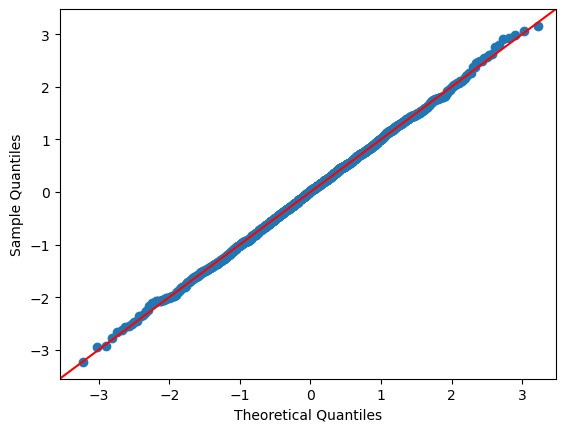

quartile plot for: XMEAS(14)


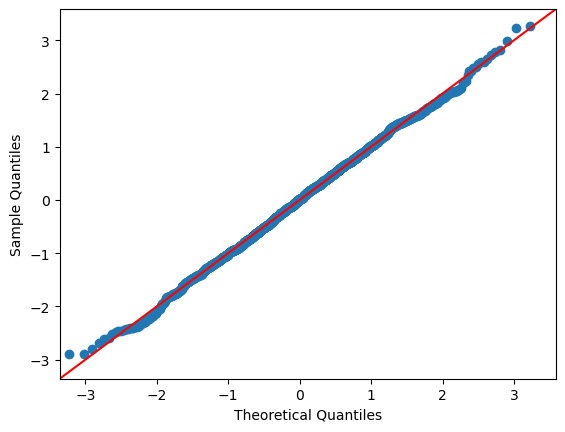

quartile plot for: XMEAS(15)


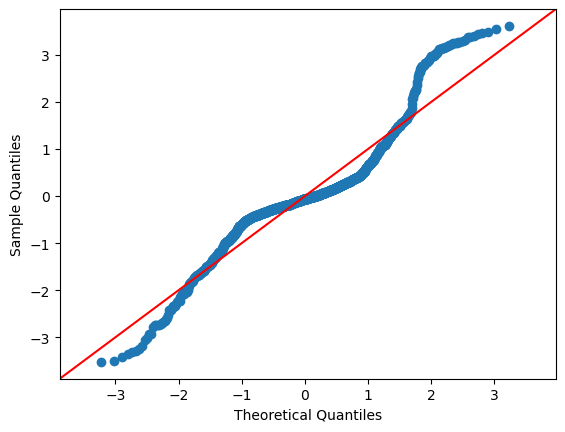

quartile plot for: XMEAS(16)


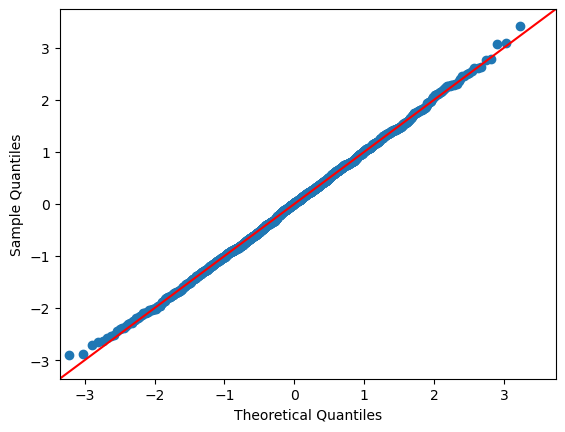

quartile plot for: XMEAS(17)


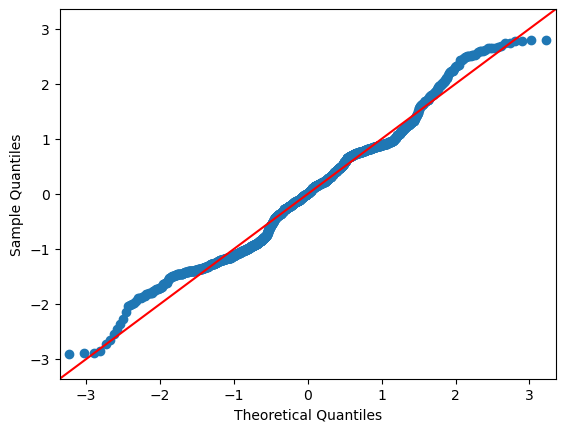

quartile plot for: XMEAS(18)


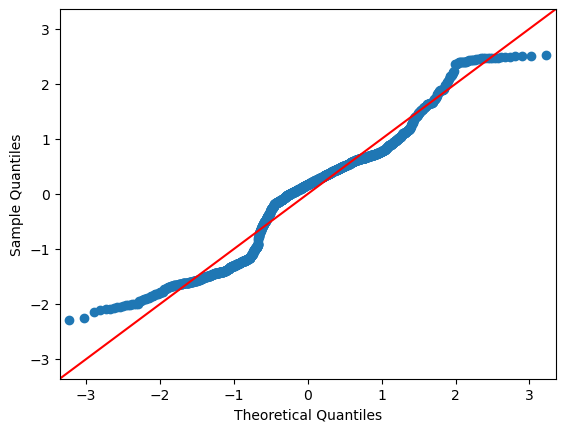

quartile plot for: XMEAS(19)


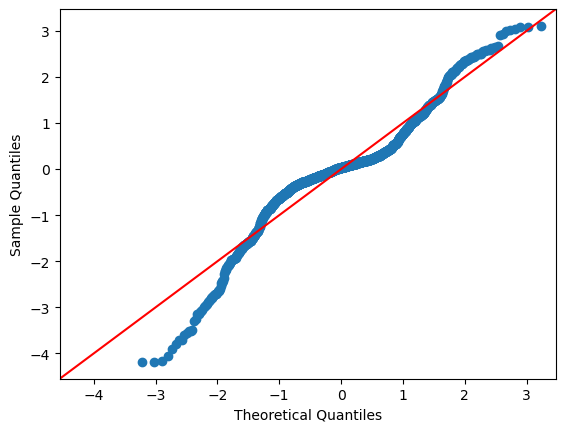

quartile plot for: XMEAS(20)


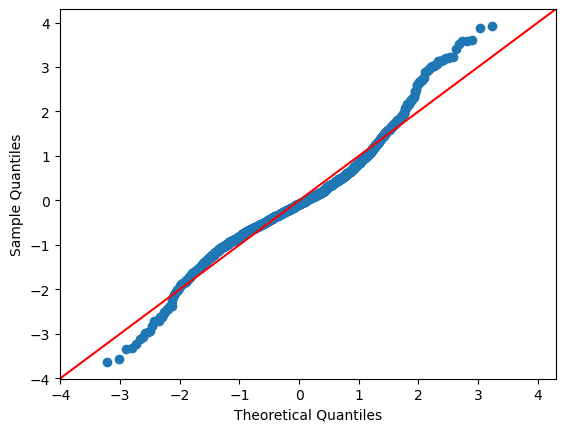

quartile plot for: XMEAS(21)


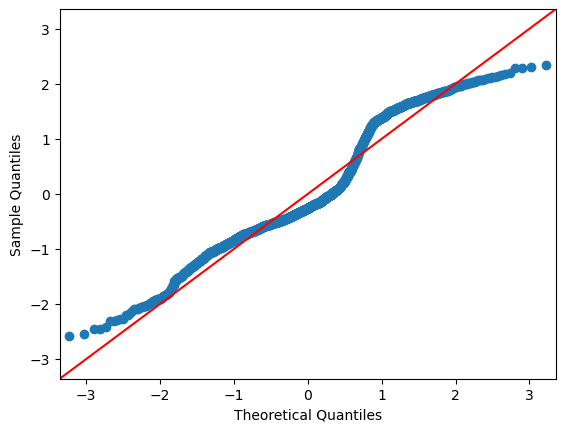

quartile plot for: XMEAS(22)


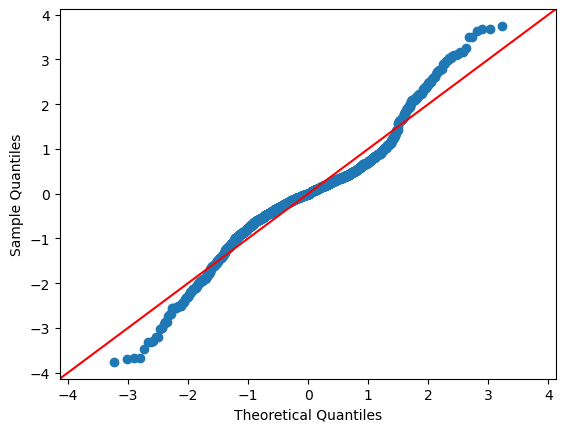

quartile plot for: XMEAS(23)


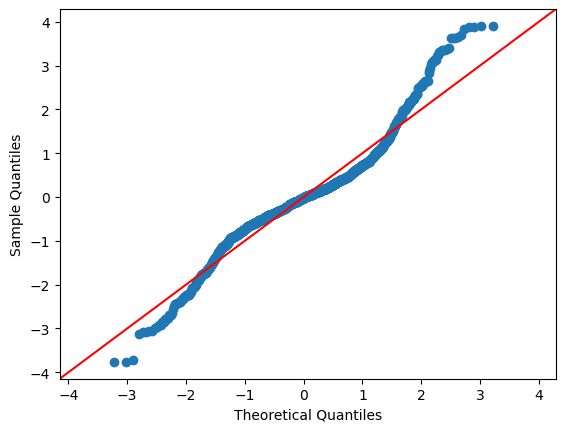

quartile plot for: XMEAS(24)


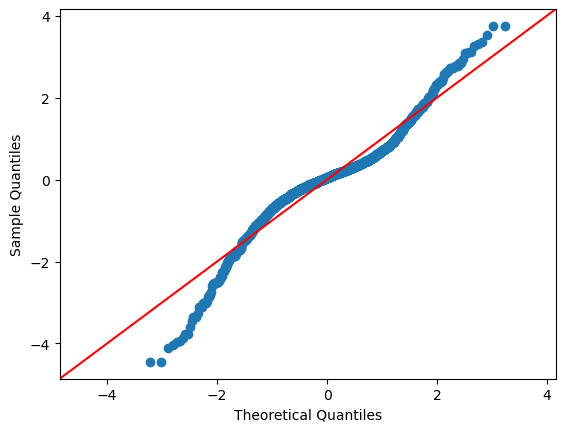

quartile plot for: XMEAS(25)


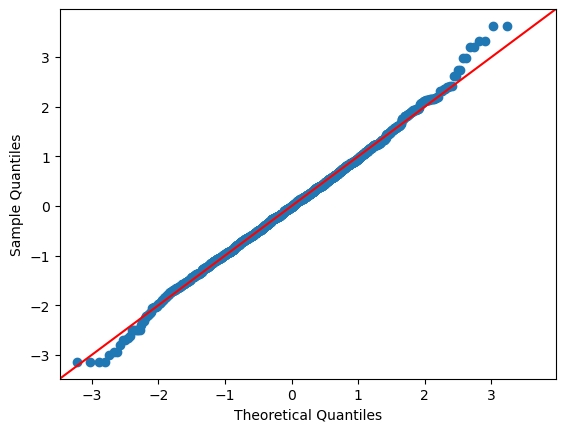

quartile plot for: XMEAS(26)


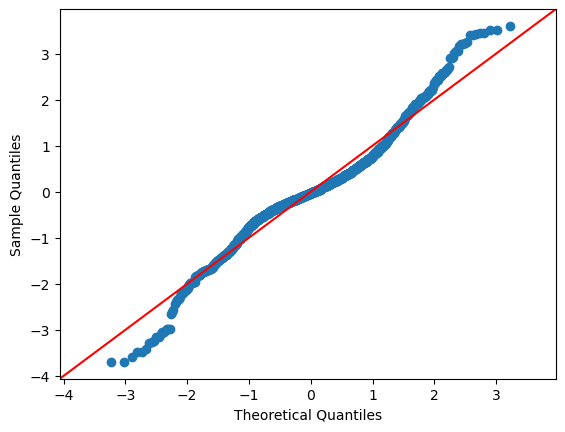

quartile plot for: XMEAS(27)


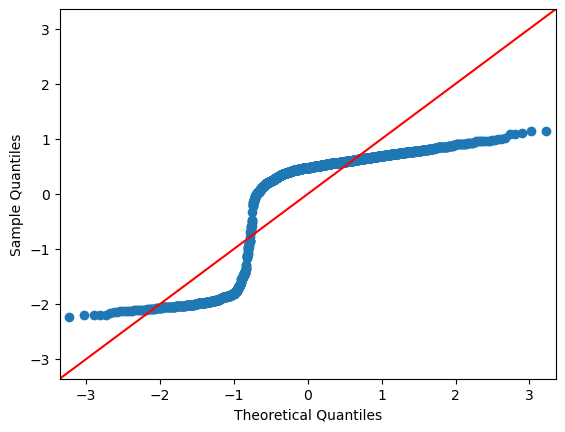

quartile plot for: XMEAS(28)


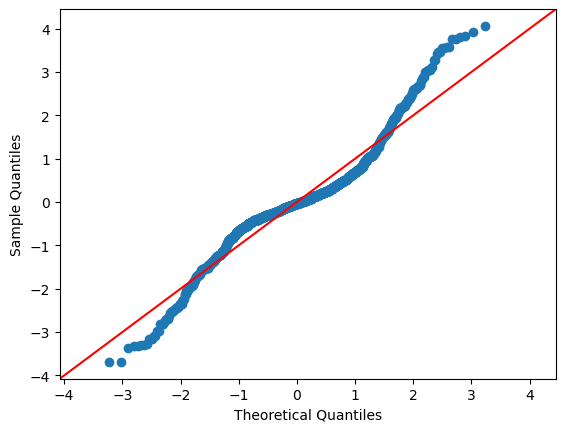

quartile plot for: XMEAS(29)


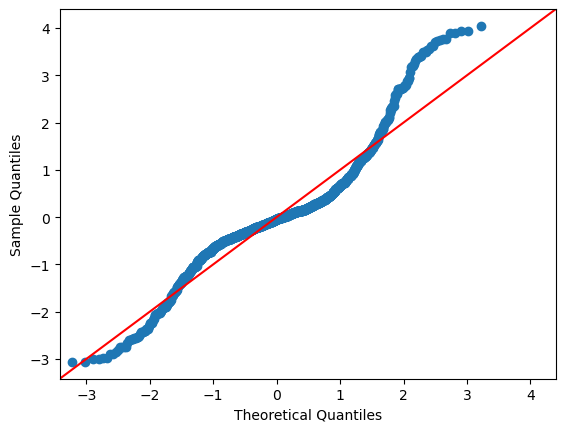

quartile plot for: XMEAS(30)


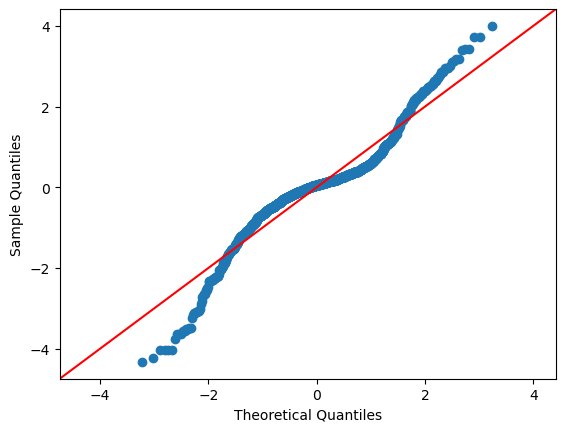

quartile plot for: XMEAS(31)


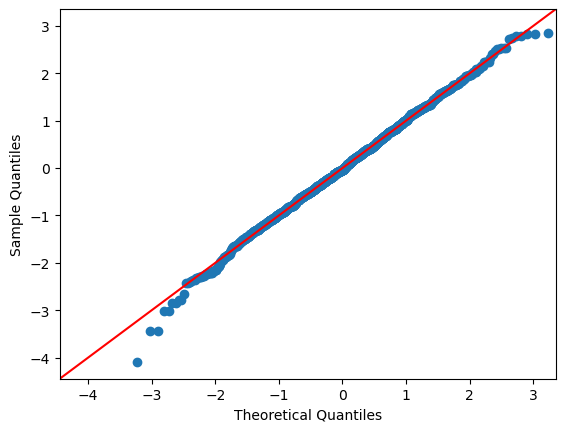

quartile plot for: XMEAS(32)


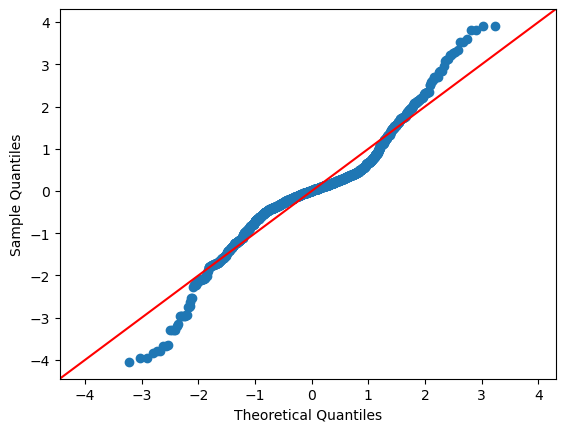

quartile plot for: XMEAS(33)


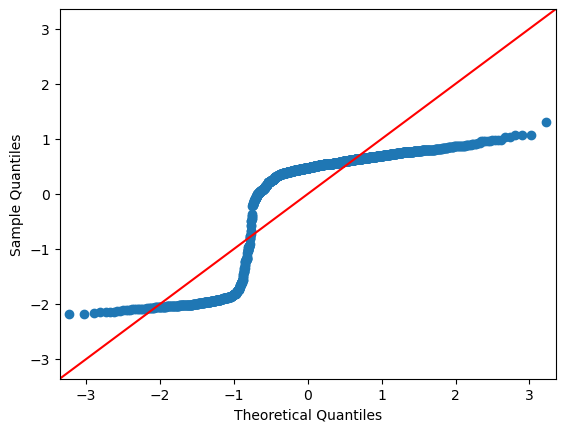

quartile plot for: XMEAS(34)


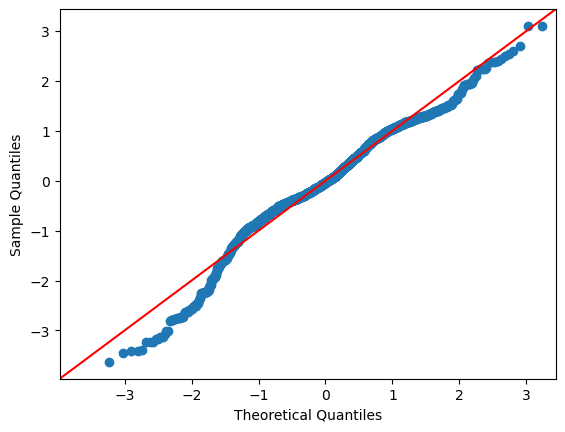

quartile plot for: XMEAS(35)


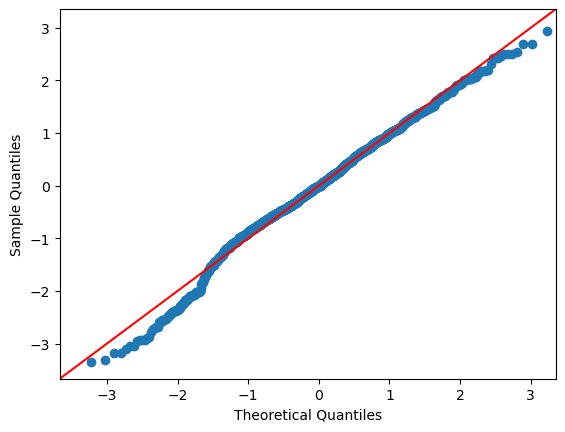

quartile plot for: XMEAS(36)


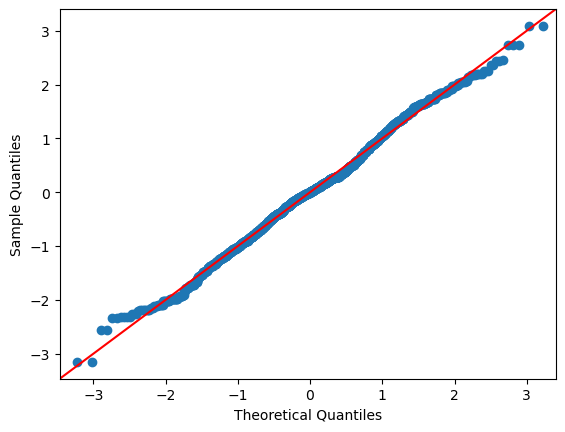

quartile plot for: XMEAS(37)


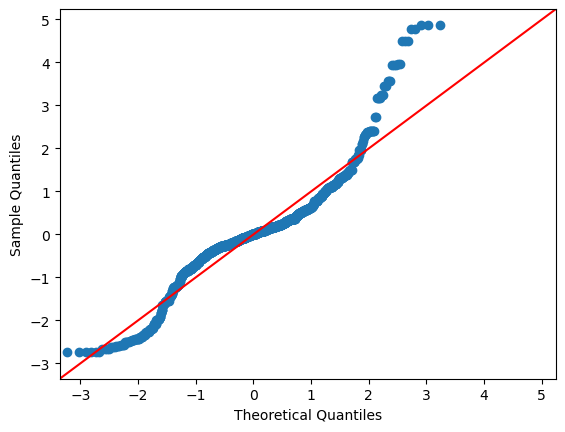

quartile plot for: XMEAS(38)


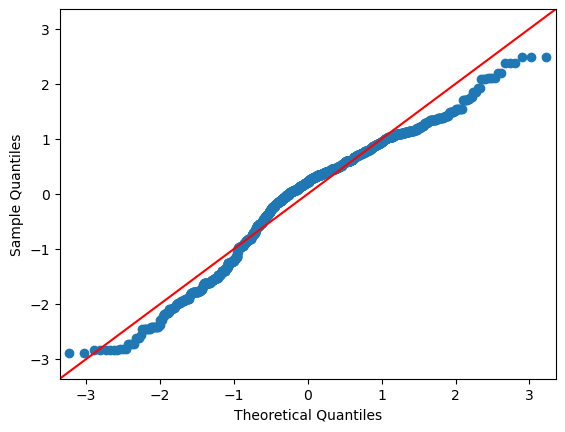

quartile plot for: XMEAS(39)


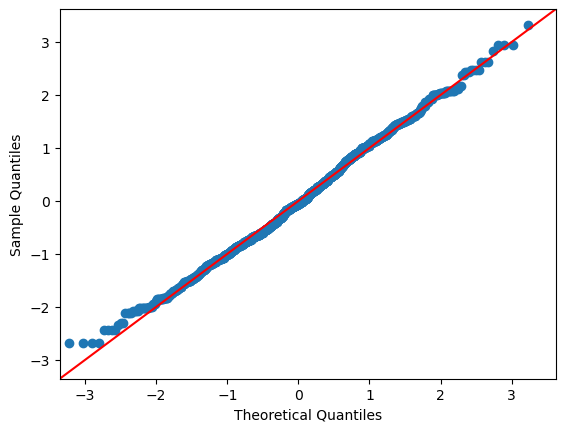

quartile plot for: XMEAS(40)


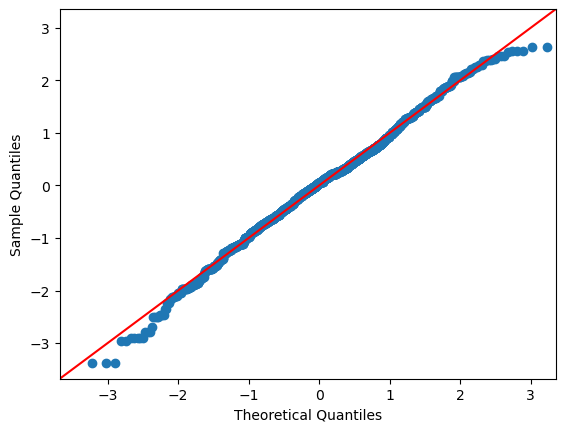

quartile plot for: XMEAS(41)


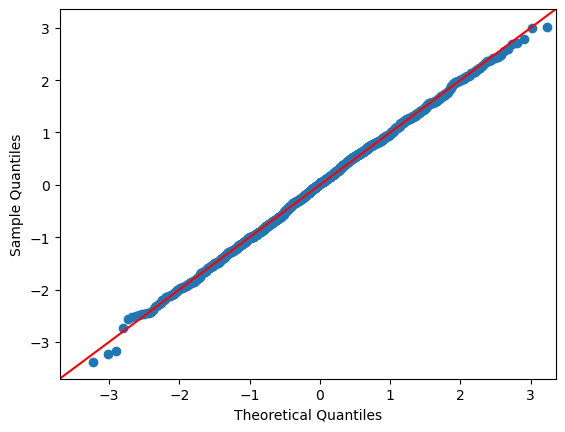

quartile plot for: XMV(1)


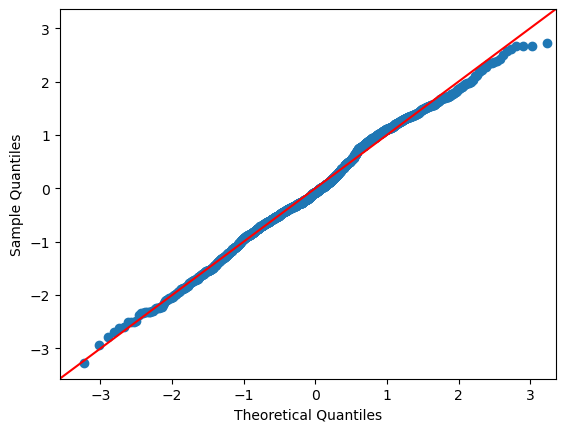

quartile plot for: XMV(2)


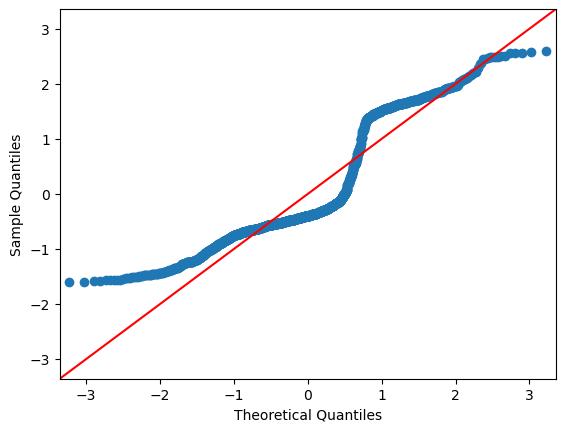

quartile plot for: XMV(3)


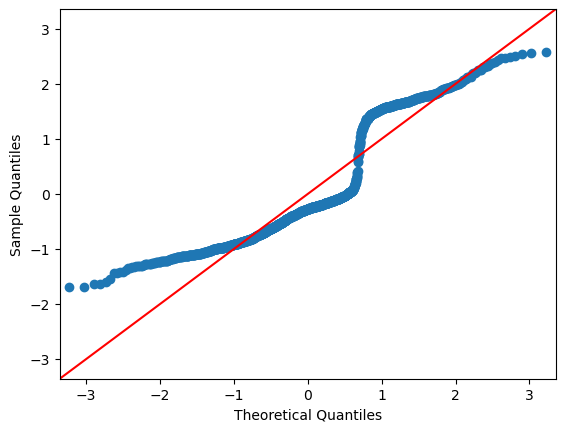

quartile plot for: XMV(4)


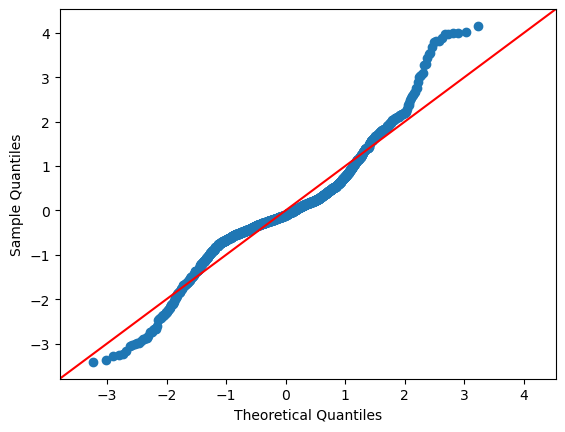

quartile plot for: XMV(5)


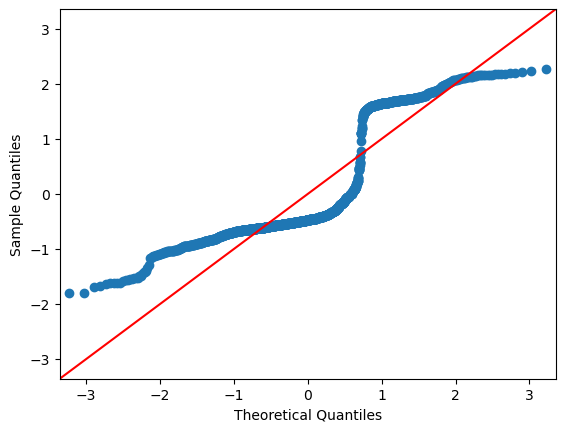

quartile plot for: XMV(6)


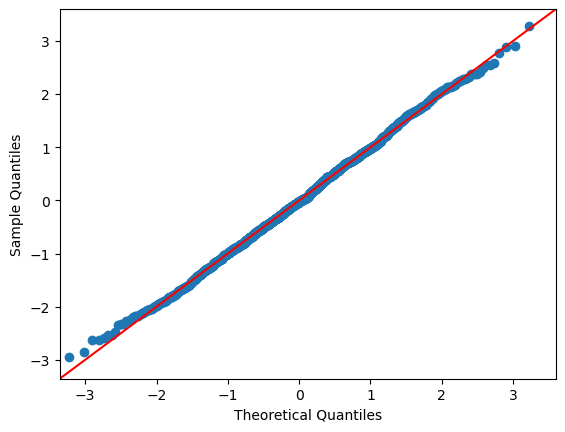

quartile plot for: XMV(7)


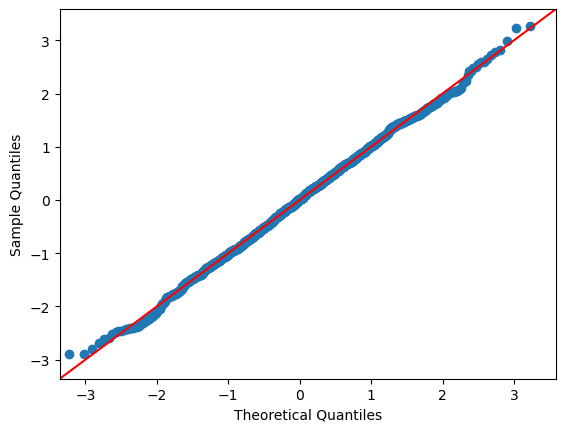

quartile plot for: XMV(8)


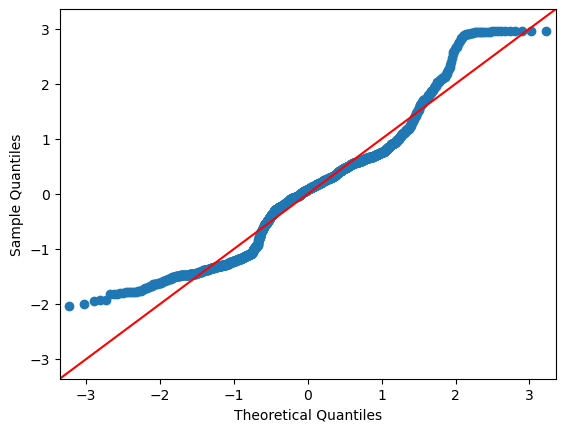

quartile plot for: XMV(9)


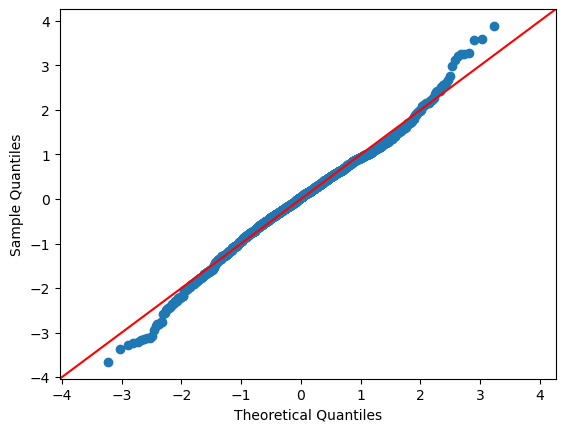

quartile plot for: XMV(10)


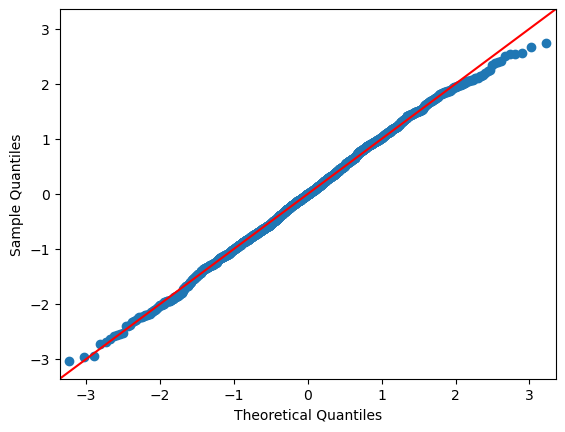

quartile plot for: XMV(11)


C:\Users\johnj\AppData\Local\Temp\ipykernel_25052\2475964185.py:7: RuntimeWarning: invalid value encountered in divide
  sm.qqplot((X_train[:,i] - X_train[:,i].mean(axis=0)) / X_train[:,i].std(axis=0), line='45')


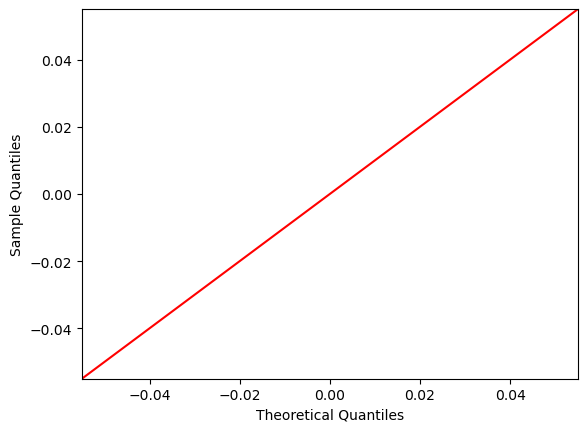

quartile plot for: label


In [5]:
import numpy as np
import statsmodels.api as sm
import pylab

X_train = x.to_numpy()
for i in range(0,x.shape[1]):
    sm.qqplot((X_train[:,i] - X_train[:,i].mean(axis=0)) / X_train[:,i].std(axis=0), line='45')
    pylab.show()
    print('quartile plot for:', x.columns[i])

In [ ]:
print(x.shape[1])

In [ ]:
y = pd.read_csv(test_path)

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab

X_test = y.to_numpy()
for i in range(0,y.shape[1]):
    sm.qqplot((X_test[:,i] - X_test[:,i].mean(axis=0)) / X_test[:,i].std(axis=0), line='45')
    pylab.show()
    print('quartile plot for:', y.columns[i])

In [ ]:
def fit_model(X):
    """
    Returns the fitted model. In this simple example, the anomaly detection
    model is the threshold that will flag anomalies, but it can be any object
    as long as the predict() function knows how to handle it when passed as an
    argument.

    Parameters
    ----------
    X : 2D numpy array.
        Already preprocessed data used to fit the model.

    Returns
    -------
    model : object
        Fitted model.
    """
    mean = X.mean()
    var = np.cov(X, rowvar=False)
    
    n = len(mean)
    if var.ndim == 1:
            var = np.diag(var)
    p = (2 * np.pi)**(- n/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    if len(p) == 1:
        p_model = p[0]
    else:
        p_model=p

    threshold = np.percentile(p_model, 66)
    return p_model, threshold    

In [ ]:
b = x.mean()
print(len(b))
c=np.cov(x,rowvar=False)
d=x.std()

In [ ]:
a = fit_model(x)